# Objective:

Conduct analysis on the data and uncover insights about the loans’ performance:

- implement one or more algorithms to predict whether a loan will be good or bad
- assess the performance of your algorithms, using statistics or charts as necessary

Good loans are the ones where the status is current or fully paid. Bad loans are the ones where the status is default, in grace period, or late.

# Libraries to explore the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

import pylab 
pylab.rcParams['figure.figsize'] = 12, 8

% matplotlib inline 

## ------------------------------------------------------

# Loading the data

In [2]:
loan_df = pd.read_csv('/Users/Hedi/Documents/WF_data_loan.csv')
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)

## --------------------------------------------------

# Table of Content:

## Quick Overview of the Dataset

##  Exploratory Data Analysis

## -------------------------------------------------

## Quick Overview of the Dataset
    1) General information
    2) Removing null values
    3) Define good versus bad loans
    
## ---------------------------------------------

### 1) General Information

In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
id                        10000 non-null int64
loan_amnt                 10000 non-null int64
funded_amnt               10000 non-null int64
term                      9524 non-null object
int_rate                  9524 non-null float64
installment               9524 non-null float64
emp_length                9524 non-null object
home_ownership            9524 non-null object
annual_inc                9524 non-null float64
loan_status               9524 non-null object
purpose                   9524 non-null object
addr_state                10000 non-null object
dti                       9524 non-null float64
delinq_2yrs               9524 non-null float64
earliest_cr_line          9524 non-null object
mths_since_last_delinq    4100 non-null float64
open_acc                  9524 non-null float64
revol_bal                 9524 non-null float64
total_acc                 9524 non-nu

### 2) Removing/Replacing null values

In [4]:
## All the loans without any status are removed
erroneous_data_index = loan_df[loan_df['loan_status'].isnull()].index
loan_df = loan_df.drop(erroneous_data_index)

In [5]:
## Assumption: null values represent 0 months
## mths_since_last_delinq: The number of months since the borrower was last delinquent on a payment

loan_df['mths_since_last_delinq'].fillna(0,inplace=True)

### 3) Define good VS bad loans

In [6]:
# Define loan performance

def define_perf_loan(x):
    if x == 'Current' or x == 'Fully Paid':
        val = 1
    else:
        val = 0
    return val    


In [7]:
# The feature loan performance is created

loan_df['loan_perf'] = 0
loan_df['loan_perf'] = loan_df['loan_status'].apply(define_perf_loan)

In [8]:
# Class imbalance
# 95.3 of the loans are "good" loans / 4.7% of the loans are "bad" loans

loan_df['loan_perf'].value_counts()

1    9073
0     451
Name: loan_perf, dtype: int64

# ------------------------------------------

## Exploratory Data Analysis

    1) Distribution of Categorical Features
    2) Distribution of Numerical Features
    3) Correlation between features
    4) Prepare the dataframe for modeling (dummify the categorcial variables)
    
## ------------------------------------------

### 1) Distribution of Categorical Features

In [32]:
def categorical_param_analysis(parameter, data):
    """
    Input:
    ------
    parameter: string of a categorical feature of the data
    Output:
    -------
    plot describing 10 instances that have the highest good loan probability 
    
    """
    interm_data = data.groupby(by='{}'.format(parameter))[['loan_perf']].apply(lambda x: np.mean(x))\
                                                              .reset_index()\
                                                              .sort_values(by='loan_perf',ascending =False)\
                                                              .head(15)

    g = sns.factorplot(x="{}".format(parameter), y="loan_perf", data=interm_data,
                               size=6, kind="bar", palette="muted")
    g.despine(left=True)
    g.set_ylabels("Good loan success probability")
    plt.xticks(rotation =30)
    plt.show()

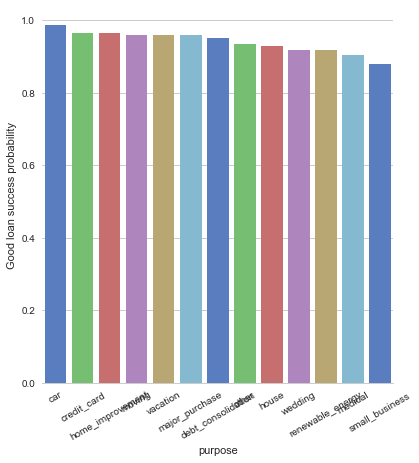

In [33]:
categorical_param_analysis('purpose',loan_df)

### 2) Distribution of Numerical Features

In [11]:
def numerical_param_analysis(parameter, data):
    """
    Input:
    ------
    parameter: string of a numerical feature of the data
    data: Dataframe
    Output: Distribution
    -------
    
    """
    #print('info is'.format(data[parameter])
    
    data.hist(column=parameter, bins=100, figsize=(20,8))
    

    plt.xlabel("{}".format(parameter))
    plt.ylabel("Number of loans")
    #plt.title("The average drivervalue per 28 days period")
    #plt.savefig('Average driver value per 28 days perdiod.png')
    plt.show()

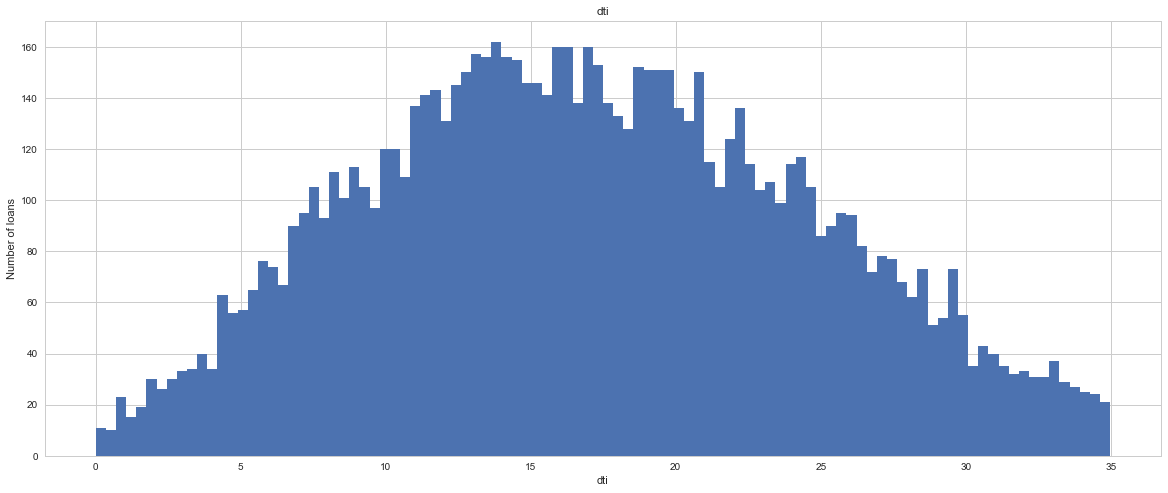

In [29]:
numerical_param_analysis('dti',loan_df[loan_df['loan_perf']==1])

### 3) Correlation between Features

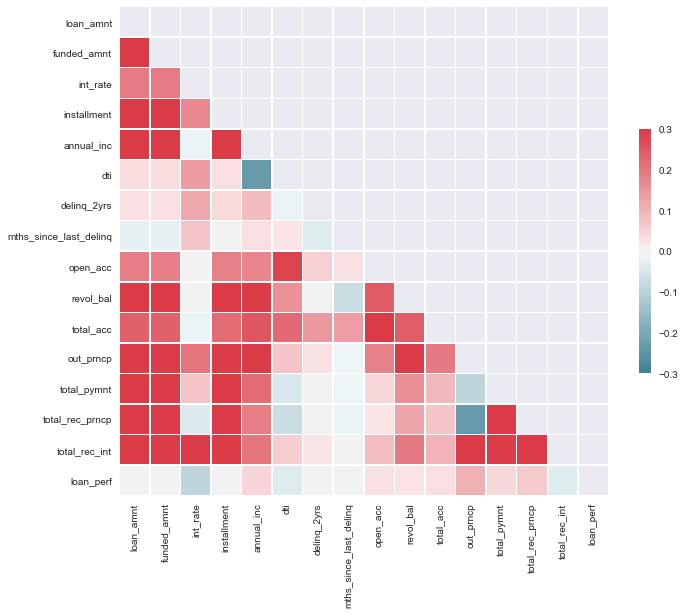

In [13]:
# Compute the correlation matrix
corr = loan_df[[col for col in loan_df.columns if col not in ['id']]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
loan_df.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,loan_perf
0,571203,18000,18000,60 months,10.16,383.87,10+ years,MORTGAGE,72804.0,Current,credit_card,MA,16.73,0.0,12/27/95 2:06,0.0,21.0,8751.0,49.0,13263.18,7273.77,4736.82,2536.95,1
1,641849,13200,13200,36 months,18.49,480.47,2 years,RENT,110000.0,Current,debt_consolidation,IL,17.02,0.0,12/11/00 11:15,29.0,16.0,16062.0,36.0,10546.93,4324.23,2653.07,1671.16,1
2,694891,15675,15675,36 months,8.90,497.74,10+ years,MORTGAGE,100000.0,Current,small_business,WA,9.10,0.0,4/7/94 12:00,0.0,16.0,20650.0,45.0,15294.25,496.78,380.75,116.03,1
3,734736,21600,21600,36 months,7.90,675.87,10+ years,MORTGAGE,95000.0,Fully Paid,house,WI,3.42,0.0,5/5/99 10:59,0.0,9.0,416.0,24.0,0.00,23521.69,21600.00,1921.69,1
4,784712,16500,16500,60 months,7.90,333.78,2 years,MORTGAGE,42000.0,Late (31-120 days),small_business,NY,10.43,0.0,7/16/93 8:41,0.0,9.0,2229.0,17.0,12966.64,5000.85,3533.36,1467.49,0


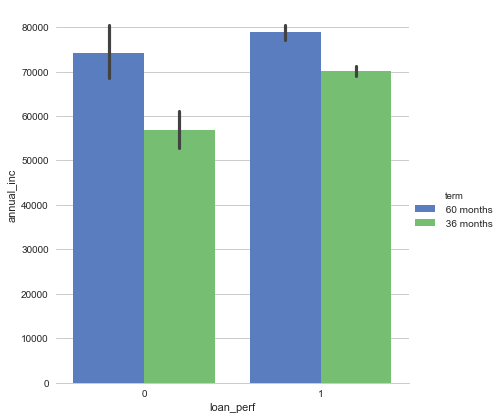

In [22]:

sns.set(style="whitegrid")


# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="loan_perf", y="annual_inc", hue ='term' ,data=loan_df,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
#g.set_ylabels("survival probability")

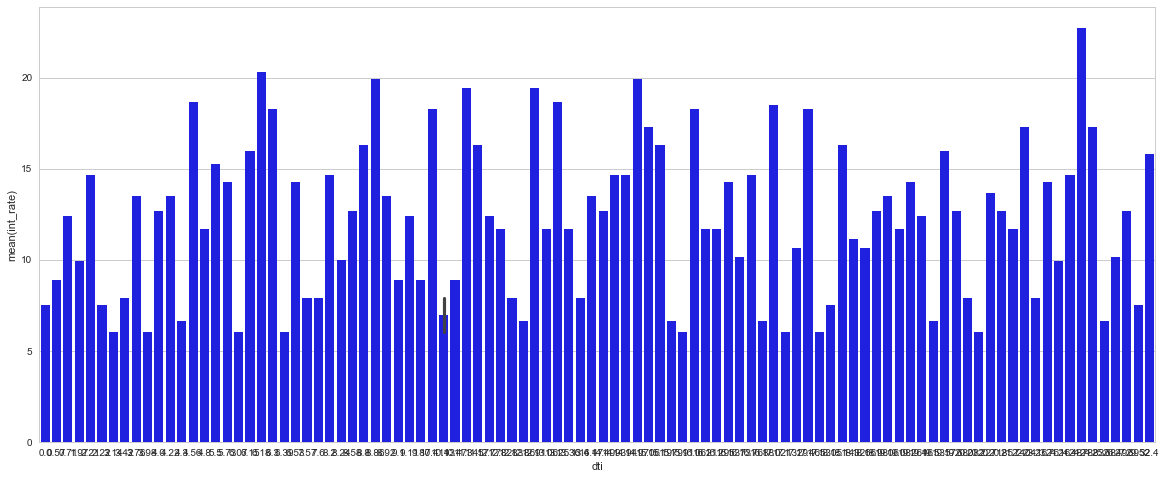

In [25]:
plt.figure(figsize=(20,8))
sns.barplot(x='dti',y='int_rate',data=loan_df.iloc[:100,:],color='blue')
#plt.savefig('retention.png')

### 4) Dummify the categorical variables

In [14]:
## Assumption: loans with n/a as employement_length at the last job means that it's the first job of the borrower
loan_df['emp_length'].replace(to_replace={'n/a':'First_job'},inplace=True)

In [40]:
loan_df_modeling = loan_df[[col for col in loan_df.columns if col not in ['loan_status','earliest_cr_line']]]

In [41]:
# All the categorical features are dummified for modeling purposes
loan_df_modeling = pd.get_dummies(loan_df_modeling,columns=['emp_length','term','home_ownership','purpose','addr_state'])

In [18]:
loan_df_modeling.head()

,id,loan_amnt,funded_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,loan_perf,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_First_job,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MT,addr_state_NC,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,571203,18000,18000,10.16,383.87,72804.0,Current,16.73,0.0,12/27/95 2:06,0.0,21.0,8751.0,49.0,13263.18,7273.77,4736.82,2536.95,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,641849,13200,13200,18.49,480.47,110000.0,Current,17.02,0.0,12/11/00 11:15,29.0,16.0,16062.0,36.0,10546.93,4324.23,2653.07,1671.16,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,694891,15675,15675,8.90,497.74,100000.0,Current,9.10,0.0,4/7/94 12:00,0.0,16.0,20650.0,45.0,15294.25,496.78,380.75,116.03,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,734736,21600,21600,7.90,675.87,95000.0,Fully Paid,3.42,0.0,5/5/99 10:59,0.0,9.0,416.0,24.0,0.00,23521.69,21600.00,1921.69,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,784712,16500,16500,7.90,333.78,42000.0,Late (31-120 days),10.43,0.0,7/16/93 8:41,0.0,9.0,2229.0,17.0,12966.64,5000.85,3533.36,1467.49,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
loan_df_modeling.to_csv('loan_df_modeling')